In [1]:
import os
import glob
import threading
import numpy as np
from PIL import Image

base_path = '/atlas/home/zwpeng/datadreams/data/'
test_path = 'test/'
mask_path = 'mask_new/'

In [2]:
test_set = glob.glob(os.path.join(base_path,test_path,'*.tiff'))
mask_set = glob.glob(os.path.join(base_path,mask_path,'*.jpg'))
print(test_set,len(mask_set))

['/atlas/home/zwpeng/datadreams/data/test/2017-06-10_14.09.49.ndpi.17.44712_9311.2048x2048.tiff', '/atlas/home/zwpeng/datadreams/data/test/2017-06-10_15.51.33.ndpi.16.26705_23287.2048x2048.tiff', '/atlas/home/zwpeng/datadreams/data/test/normal13.ndpi.16.28071_23435.2048x2048.tiff', '/atlas/home/zwpeng/datadreams/data/test/normal3.ndpi.17.77727_13623.2048x2048.tiff'] 560


In [3]:
print(test_set[0])

/atlas/home/zwpeng/datadreams/data/test/2017-06-10_14.09.49.ndpi.17.44712_9311.2048x2048.tiff


In [4]:
print(os.path.splitext(test_set[0])[0].split('/')[-1])

2017-06-10_14.09.49.ndpi.17.44712_9311.2048x2048


In [5]:
def prediction_from_model(patch, model):
    prediction = model.predict(patch.reshape(1, 256, 256, 3))
    return prediction

In [6]:
from keras.models import load_model

model = load_model('model10032100_01.h5')

Using TensorFlow backend.


In [ ]:
from tqdm import tqdm
from PIL import Image

widths, heights = 256, 256
step_len = 32

# test_set = test_set[:1]

for key,value in tqdm(enumerate(test_set)):
    img = Image.open(value)
    src_mask = Image.open(os.path.join(base_path, mask_path, os.path.splitext(value)[0].split('/')[-1] + '.png.jpg'))
    pre_map = np.zeros(img.size)
    y, pred = [],[]
    for h in tqdm(range(img.size[0]//step_len)):
        for w in range(img.size[1]//step_len):
            mask_pat = src_mask.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
            mask_pat_array = np.array(mask_pat.convert("L"))
            if mask_pat_array.any():
                y.append(1)
            else:
                y.append(0)
            pat = img.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
            pat_array = np.array(pat.convert("RGB"))/255.
            pre_pat = prediction_from_model(pat_array, model)
            pred.append(pre_pat[0][0])
            pre_map[w*step_len:(w+1)*step_len,h*step_len:(h+1)*step_len] = pre_pat[0][0]

In [34]:
from tqdm import tqdm

widths, heights = 256, 256
step_len = 32

img = Image.open(test_set[1])
src_mask = Image.open(os.path.join(base_path, mask_path, os.path.splitext(test_set[1])[0].split('/')[-1] + '.png.jpg'))
pre_map = np.zeros(img.size)
y, pred = [],[]
for h in tqdm(range(img.size[0]//step_len)):
    for w in range(img.size[1]//step_len):
        mask_pat = src_mask.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
        mask_pat_array = np.array(mask_pat.convert("L"))
        if mask_pat_array.any():
            y.append(1)
        else:
            y.append(0)
        pat = img.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
        pat_array = np.array(pat.convert("RGB"))/255.
        pre_pat = prediction_from_model(pat_array, model)
        pred.append(pre_pat[0][0])
        pre_map[w*step_len:(w+1)*step_len,h*step_len:(h+1)*step_len] = pre_pat[0][0]

100%|██████████| 64/64 [02:51<00:00,  2.55s/it]


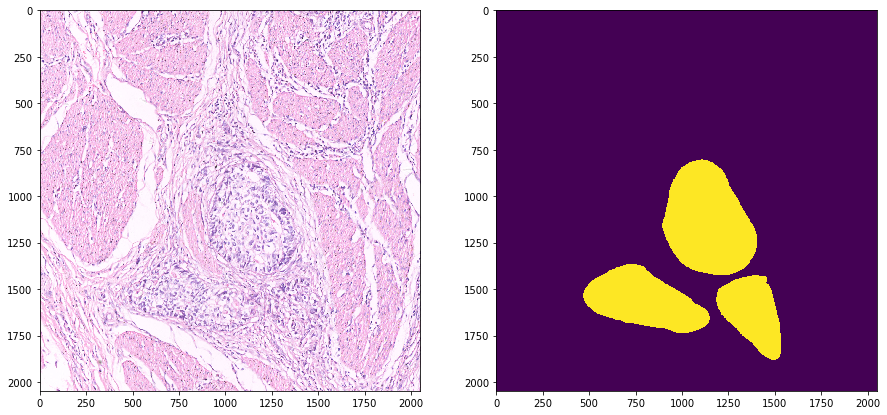

In [35]:
f, axes = plt.subplots(1,2,figsize=(15,15))
ax = axes.flatten()
ax[0].imshow(img)
ax[1].imshow(src_mask)

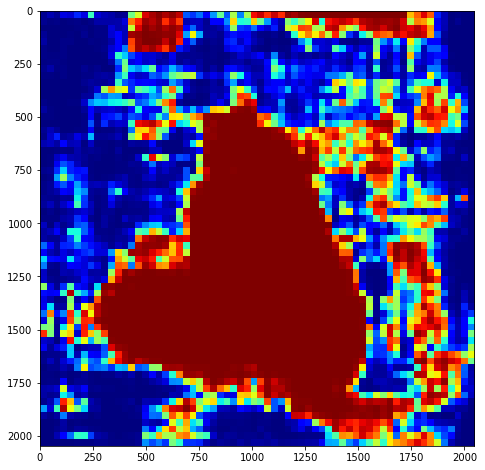

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


fig1, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.transpose(pre_map), cmap='jet', vmin=0, vmax=1)
# ax.imshow(pre_map, cmap='jet', vmin=0, vmax=1)
# fig1.savefig(model_path+'/'+'pre'+(test_set[i].split('.')[0]).split('/')[-1]+'.png')
fig1.savefig('w01.png')
# plt.close()

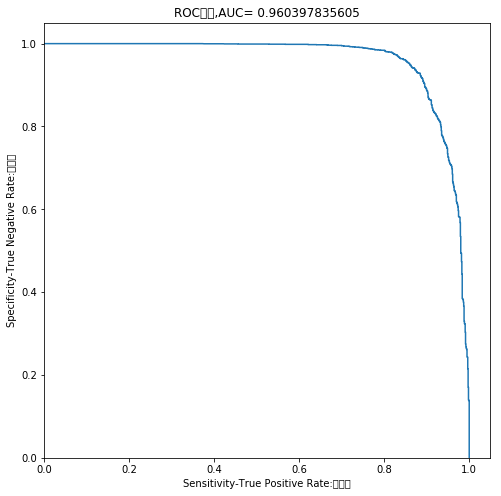

In [37]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=None)
fig2, ax = plt.subplots(figsize=(8, 8))
ax.plot(tpr, [(1-fpr[i]) for i in range(fpr.shape[0])])    # 一句循环获取该array
ax.set_xlim([0.0,1.05])
ax.set_ylim([0.0,1.05])
ax.set_xlabel('Sensitivity-True Positive Rate:正确率')
ax.set_ylabel('Specificity-True Negative Rate:误判率')
ax.set_title('ROC曲线,AUC= %s'%(metrics.auc(fpr, tpr)))
fig2.savefig('w01_auc.png')
# plt.close()

In [30]:
from tqdm import tqdm

widths, heights = 256, 256
step_len = 32

img = Image.open(test_set[2])
# src_mask = Image.open(os.path.join(base_path, mask_path, os.path.splitext(test_set[0])[0].split('/')[-1] + '.png.jpg'))
pre_map = np.zeros(img.size)
y, pred = [],[]
for h in tqdm(range(img.size[0]//step_len)):
    for w in range(img.size[1]//step_len):
#         mask_pat = src_mask.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
#         mask_pat_array = np.array(mask_pat.convert("L"))
#         if mask_pat_array.any():
#             y.append(1)
#         else:
#             y.append(0)
        pat = img.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
        pat_array = np.array(pat.convert("RGB"))/255.
        pre_pat = prediction_from_model(pat_array, model)
        pred.append(pre_pat[0][0])
        pre_map[w*step_len:(w+1)*step_len,h*step_len:(h+1)*step_len] = pre_pat[0][0]

100%|██████████| 64/64 [02:48<00:00,  2.64s/it]


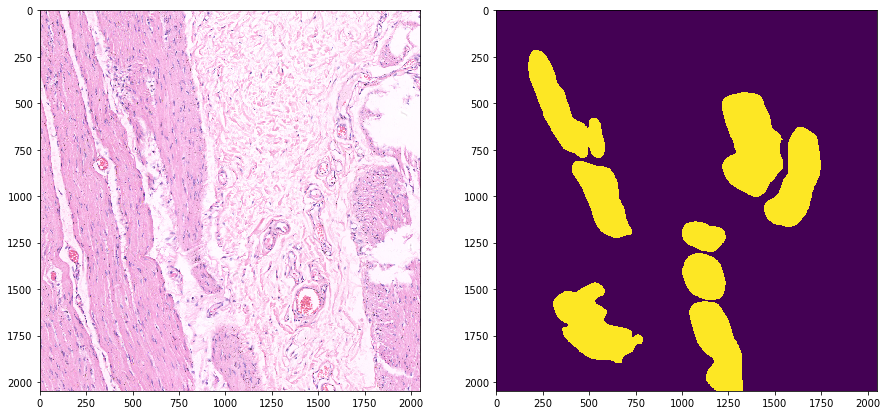

In [31]:
f, axes = plt.subplots(1,2,figsize=(15,15))
ax = axes.flatten()
ax[0].imshow(img)
ax[1].imshow(src_mask)

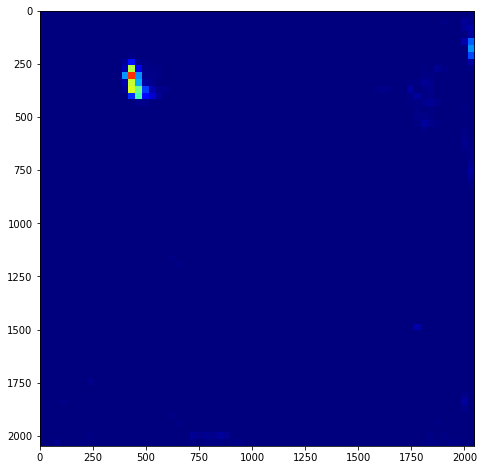

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


fig1, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.transpose(pre_map), cmap='jet', vmin=0, vmax=1)
# ax.imshow(pre_map, cmap='jet', vmin=0, vmax=1)
# fig1.savefig(model_path+'/'+'pre'+(test_set[i].split('.')[0]).split('/')[-1]+'.png')
fig1.savefig('w01.png')
# plt.close()

In [1]:
import os
import glob
import threading
import numpy as np
from PIL import Image

base_path = '/atlas/home/zwpeng/datadreams/data/'
test_path = 'test/'
mask_path = 'mask_new/'
test_set = glob.glob(os.path.join(base_path,test_path,'*.tiff'))
mask_set = glob.glob(os.path.join(base_path,mask_path,'*.jpg'))
print(test_set,len(mask_set))

def prediction_from_model(patch, model):
    prediction = model.predict(patch.reshape(1, 256, 256, 3))
    return prediction

from keras.models import load_model

model = load_model('model10032100_04_p.h5')

['/atlas/home/zwpeng/datadreams/data/test/2017-06-10_14.09.49.ndpi.17.44712_9311.2048x2048.tiff', '/atlas/home/zwpeng/datadreams/data/test/2017-06-10_15.51.33.ndpi.16.26705_23287.2048x2048.tiff', '/atlas/home/zwpeng/datadreams/data/test/normal13.ndpi.16.28071_23435.2048x2048.tiff', '/atlas/home/zwpeng/datadreams/data/test/normal3.ndpi.17.77727_13623.2048x2048.tiff'] 560


Using TensorFlow backend.


In [2]:
from tqdm import tqdm

widths, heights = 256, 256
step_len = 32

img = Image.open(test_set[1])
src_mask = Image.open(os.path.join(base_path, mask_path, os.path.splitext(test_set[1])[0].split('/')[-1] + '.png.jpg'))
pre_map = np.zeros(img.size)
y, pred = [],[]
for h in tqdm(range(img.size[0]//step_len)):
    for w in range(img.size[1]//step_len):
        mask_pat = src_mask.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
        mask_pat_array = np.array(mask_pat.convert("L"))
        if mask_pat_array.any():
            y.append(1)
        else:
            y.append(0)
        pat = img.crop((w*step_len,  h*step_len, w*step_len+widths, h*step_len+heights))
        pat_array = np.array(pat.convert("RGB"))/255.
        pre_pat = prediction_from_model(pat_array, model)
        pred.append(pre_pat[0][0])
        pre_map[w*step_len:(w+1)*step_len,h*step_len:(h+1)*step_len] = pre_pat[0][0]

100%|██████████| 64/64 [02:54<00:00,  2.55s/it]


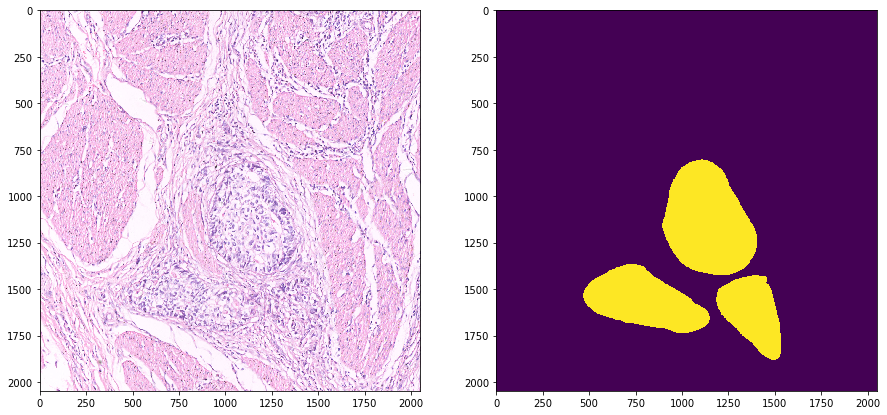

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(1,2,figsize=(15,15))
ax = axes.flatten()
ax[0].imshow(img)
ax[1].imshow(src_mask)

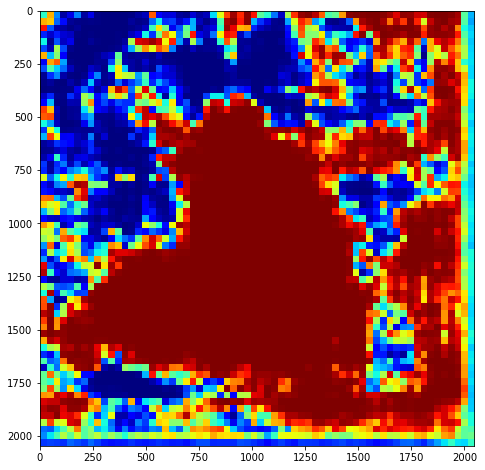

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


fig1, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.transpose(pre_map), cmap='jet', vmin=0, vmax=1)
# ax.imshow(pre_map, cmap='jet', vmin=0, vmax=1)
# fig1.savefig(model_path+'/'+'pre'+(test_set[i].split('.')[0]).split('/')[-1]+'.png')
fig1.savefig('w01.png')
# plt.close()

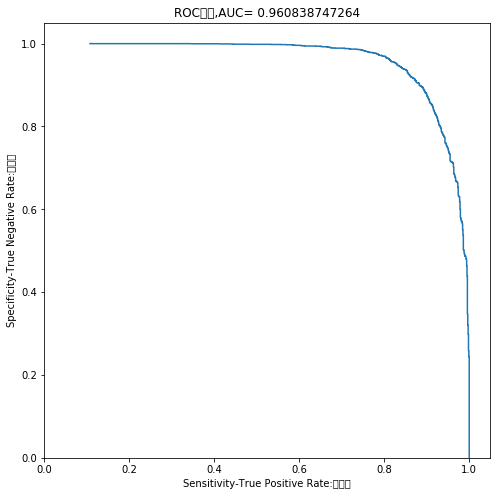

In [5]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=None)
fig2, ax = plt.subplots(figsize=(8, 8))
ax.plot(tpr, [(1-fpr[i]) for i in range(fpr.shape[0])])    # 一句循环获取该array
ax.set_xlim([0.0,1.05])
ax.set_ylim([0.0,1.05])
ax.set_xlabel('Sensitivity-True Positive Rate:正确率')
ax.set_ylabel('Specificity-True Negative Rate:误判率')
ax.set_title('ROC曲线,AUC= %s'%(metrics.auc(fpr, tpr)))
fig2.savefig('w01_auc.png')
# plt.close()